In [84]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# to make this notebook's output stable across runs
np.random.seed(42)

In [85]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
    plt.show()
    plt.close()

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    
    plt.ylabel('Price')
    plt.legend()

# Tarea

## Ejercicio #1

In [86]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')

X = df[['Number of Units']]
y = df['Manufacturing Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [87]:
alpha = 10
modelos = []
modelos.append(('LR', LinearRegression()))
modelos.append(('LASSO', Lasso(alpha)))  
modelos.append(('RIDGE', Ridge(alpha)))

pr = PolynomialFeatures(degree=3)
y_hat = []
scores = {}

for name, model in modelos:
    print("%s:" % name)
    
    if(name == 'LR'):
      mm = model.fit(X_train, y_train)
      predictions = mm.predict(X_test)
    else:
      x_train_pr = pr.fit_transform(X_train)
      x_test_pr = pr.fit_transform(X_test)
      mm = model.fit(x_train_pr, y_train)
      predictions = mm.predict(x_test_pr)
        
    print('Coeficient:', mm.coef_)
    print('Intercept: ',mm.intercept_)
    y_hat.append((name,predictions))
    
    scores['MAE_'+name] = metrics.mean_absolute_error(y_test, predictions)
    scores['RMSE_'+name] = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    scores['R2_'+name] = r2_score(y_test, predictions)
    print('Error medio Absoluto (MAE):', scores['MAE_'+name])
    print('Root Mean Squared Error:', scores['RMSE_'+name])
    print('r2_score',scores['R2_'+name])
    print('====================')

LR:
Coeficient: [-5.98882699]
Intercept:  66.83650741226988
Error medio Absoluto (MAE): 5.013587781954963
Root Mean Squared Error: 7.108963321847682
r2_score 0.6116251549562579
LASSO:
Coeficient: [ 0.         -0.         -0.50761744 -0.        ]
Intercept:  51.09955778611683
Error medio Absoluto (MAE): 5.731473385823157
Root Mean Squared Error: 8.371864915930304
r2_score 0.4613793864461684
RIDGE:
Coeficient: [ 0.00000000e+00 -1.36808121e+01  7.55886630e-01  1.18024878e-02]
Intercept:  83.44407488945915
Error medio Absoluto (MAE): 4.4077915366860125
Root Mean Squared Error: 5.9998143135202655
r2_score 0.7233605162864671


## Regresion Lineal

In [88]:
LR = LinearRegression(fit_intercept=True)
LR.fit(X_train, y_train)
y_hat_test = LR.predict(X_test)

### Visualización

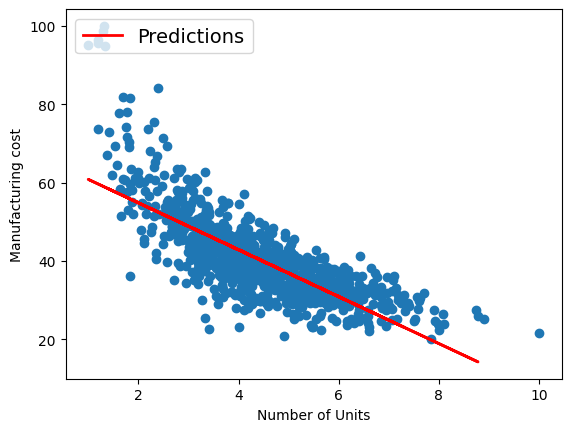

In [89]:
plt.scatter(X, y)
plt.plot(X_test, y_hat[0][1], "r-", linewidth=2, label="Predictions")
plt.xlabel("Number of Units")
plt.ylabel("Manufacturing cost")
plt.legend(loc="upper left", fontsize=14)

## Regresion Polinomial

In [90]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.fit_transform(X_test)

PLR = LinearRegression()
PLR.fit(x_train_pr, y_train)
y_hat_test = PLR.predict(x_test_pr)

### Visualización

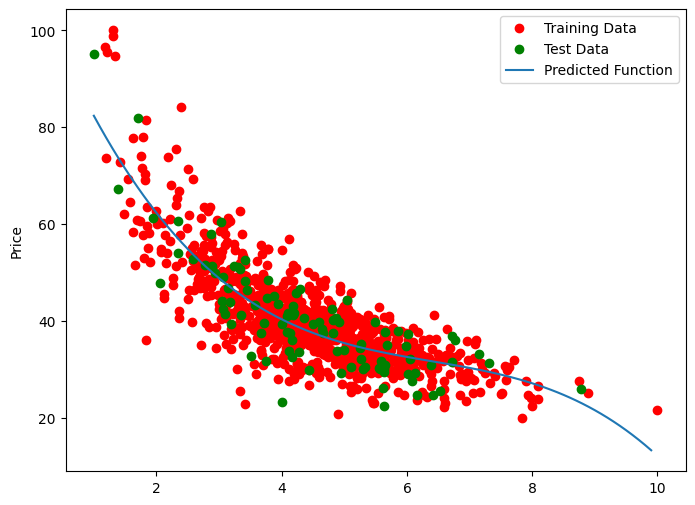

In [91]:
PollyPlot(X_train, X_test, y_train, y_test, PLR,pr)

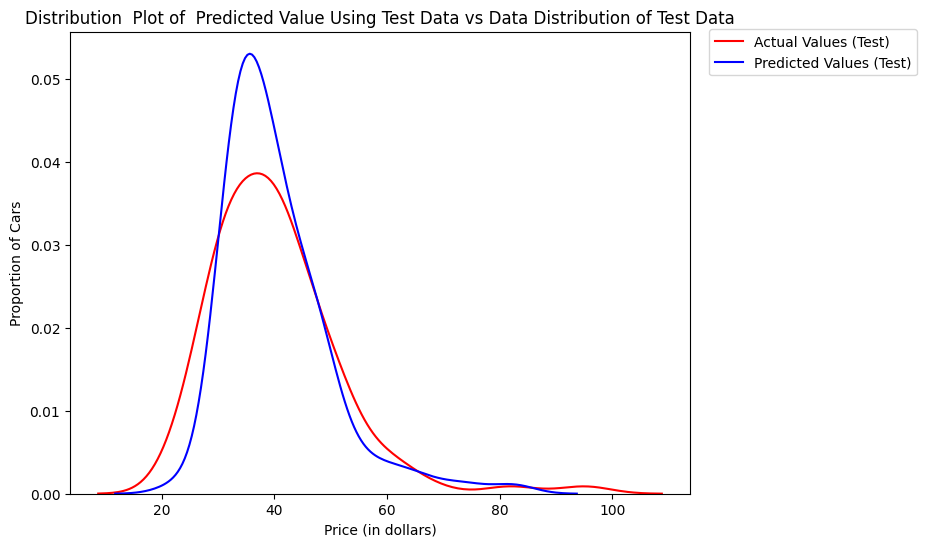

In [92]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,y_hat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

## Lasso (L1)

In [93]:
L = Lasso()
L.fit(x_train_pr, y_train)
y_hat_l = L.predict(x_test_pr)

### Visualización

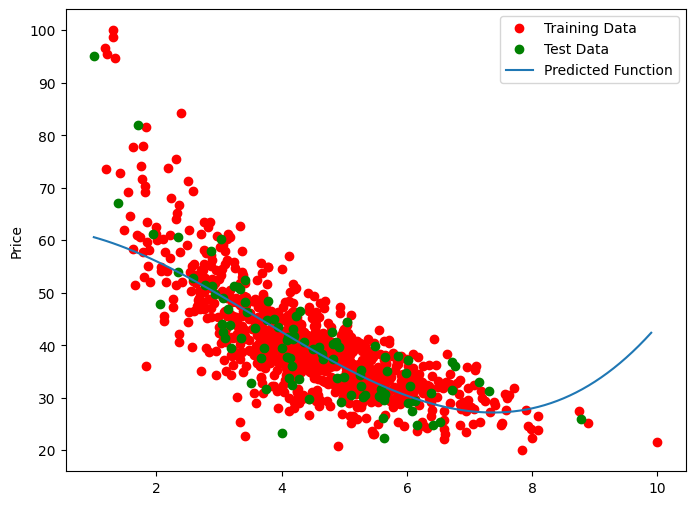

In [94]:
PollyPlot(X_train, X_test, y_train, y_test, L, pr)

## Ridge

In [95]:
RR = Ridge()
RR.fit(x_train_pr, y_train)
y_hat_rr = PLR.predict(x_test_pr)

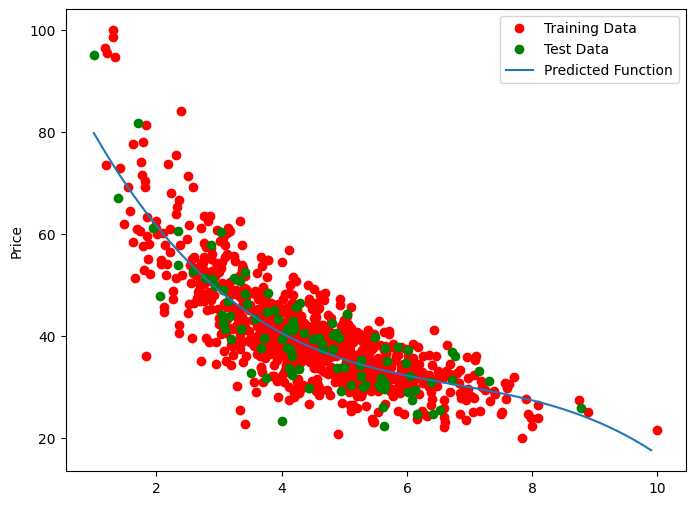

In [96]:
PollyPlot(X_train, X_test, y_train, y_test, RR, pr)

Text(0.5, 1.0, 'Mean Absolute Error')

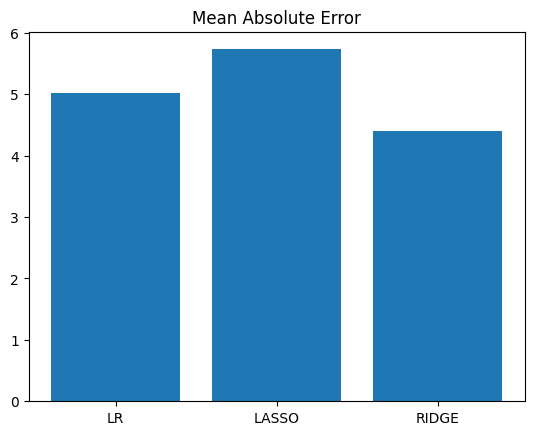

In [97]:
maes = [scores['MAE_LR'],scores['MAE_LASSO'],scores['MAE_RIDGE']]
names = ['LR', 'LASSO', 'RIDGE']
plt.bar(names, maes)
plt.title('Mean Absolute Error')

Text(0.5, 1.0, 'R2')

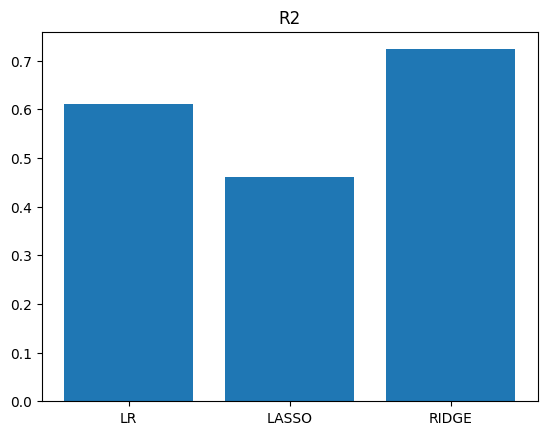

In [98]:
vals = [scores['R2_LR'],scores['R2_LASSO'],scores['R2_RIDGE']]
plt.bar(names, vals)
plt.title('R2')

# Conclusiones
El método más conveniente de estos 3 es el Ridge al tener un R2 más alto que los demás y adaptarse mejor al modelo, usando 90% de datos de entrenamiento y 10% para validación, arrojando un MAE de 4.40 (el menor de todos), se puede apreciar en la gráfica tambien.

## Ejercicio #2

In [99]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
9224,7436500120,20150219T000000,529000.0,3,1.75,1500,7367,1.0,0,0,...,8,1500,0,1974,0,98033,47.6722,-122.167,1920,7579
21444,5676000008,20150316T000000,410000.0,3,2.50,1420,1269,3.0,0,0,...,7,1420,0,2007,0,98103,47.6904,-122.342,1420,1300
1227,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,...,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
8157,522059172,20140814T000000,220000.0,3,1.00,1460,10200,1.0,0,0,...,7,1460,0,1957,0,98055,47.4238,-122.197,1460,8500
5979,2953000250,20140731T000000,275000.0,3,1.50,1900,9737,1.0,0,0,...,7,1200,700,1968,0,98031,47.4125,-122.207,1670,9737
14689,8712100760,20140924T000000,721000.0,2,1.50,1790,4250,1.0,0,0,...,7,920,870,1915,2014,98112,47.6367,-122.301,1910,4250
8965,2883200961,20140605T000000,700000.0,3,1.75,1910,4800,1.0,0,0,...,7,1080,830,1959,0,98103,47.6844,-122.332,1750,4800


In [100]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

In [101]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 17290
Tamaño de X_train: (17290, 15)
**************************************************
Mumero total de registros en el test dataset: 4323
Tamaño del X_test: (4323, 15)


In [106]:
modelos = []
modelos.append(('LR', LinearRegression()))
modelos.append(('LASSO', Lasso(alpha=20)))  
modelos.append(('RIDGE', Ridge(alpha=80)))

pr = PolynomialFeatures(degree=2)
y_hat = []
scores = {}

for name, model in modelos:
    print("%s:" % name)
    
    x_train_pr = pr.fit_transform(X_train)
    x_test_pr = pr.fit_transform(X_test)
    
    mm = model.fit(x_train_pr, y_train)
    predictions = mm.predict(x_test_pr)
        
    print('Coeficient:', mm.coef_.shape)
    print('Intercept: ',mm.intercept_)
    y_hat.append((name,predictions))
    
    scores['MAE_'+name] = metrics.mean_absolute_error(y_test, predictions)
    scores['RMSE_'+name] = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    scores['R2_'+name] = r2_score(y_test, predictions)
    print('Error medio Absoluto (MAE):', scores['MAE_'+name])
    print('Root Mean Squared Error:', scores['RMSE_'+name])
    print('r2_score',scores['R2_'+name])
    print('====================')

LR:
Coeficient: (1, 136)
Intercept:  [80865930.83585504]
Error medio Absoluto (MAE): 122014.91077758638
Root Mean Squared Error: 181468.6823377195
r2_score 0.7586269214969628
LASSO:
Coeficient: (136,)
Intercept:  [5439488.56363173]
Error medio Absoluto (MAE): 122955.47764305084
Root Mean Squared Error: 183326.4128999556
r2_score 0.7536596582762077
RIDGE:
Coeficient: (1, 136)
Intercept:  [82217603.50519878]
Error medio Absoluto (MAE): 122647.65447963522
Root Mean Squared Error: 181904.11719482733
r2_score 0.7574671803533433


c:\Users\elmer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.020e+14, tolerance: 2.323e+11
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Mean Absolute Error')

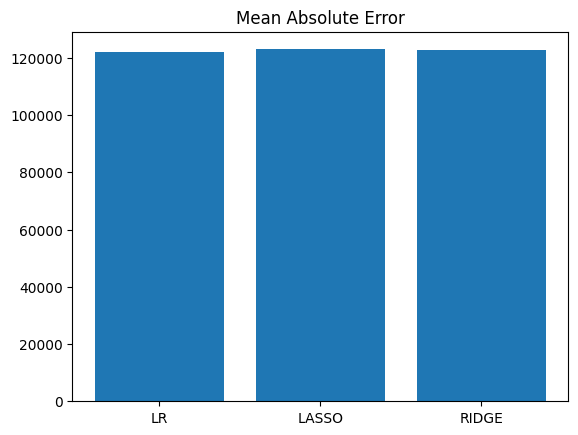

In [107]:
maes = [scores['MAE_LR'],scores['MAE_LASSO'],scores['MAE_RIDGE']]
names = ['LR', 'LASSO', 'RIDGE']
plt.bar(names, maes)
plt.title('Mean Absolute Error')

Text(0.5, 1.0, 'R2')

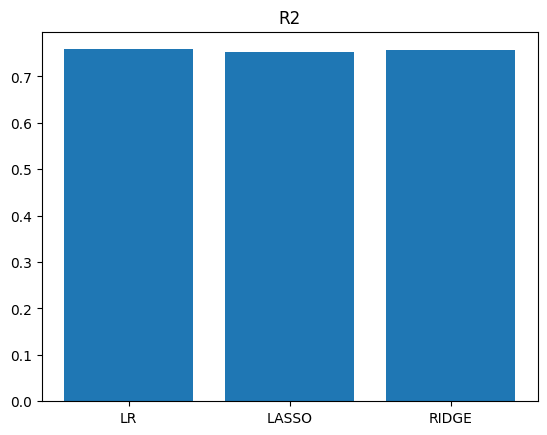

In [108]:
vals = [scores['R2_LR'],scores['R2_LASSO'],scores['R2_RIDGE']]
plt.bar(names, vals)
plt.title('R2')

## Conclusiones

Aqui el modelo de Regresión Lineal es el mejor, con 75.86% en R2 y tener el menor MAE 122,014.91 (Es mayor al tener más variables). Aunque probablemente sea mejor utilizar algún otro método y aplicar transformaciones a las variables para poderlas evaluar en la misma escala.